In [5]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import time

from helper_functions import *

plt.rcParams['font.family'] = "Arial"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preliminary analysis for time delays:

- This notebook can be used to perform a quick preliminary analysis on the delay-data from hc3 experiments.
- As of 08/30/2023 there are 10 sessions for each CA3, CA1 and EC.
- Step 1 is to look at the distribution of time delays giving the most significant MI across the three regions.
- Recording are NOT simultaneous at this point.

# Sign-convention for delays

Say $\textbf{s}_i$ is the spiketrain for neuron $i$. $\textbf{s}^{(i)}$ consists of binary elements $s^{(k)}_i = \{0, 1\}$ where $k$ is the time-bin. So, in general the spike train $\textbf{s}_i$ can be written in terms of a series of delta functions as:
$$\textbf{s}_i = \sum_{k = 1}^{N} \delta(t - t_k)$$

where $N$ is the length of spiketrain. In this analysis $N = \text{task duration}$ in seconds.

To see if the spiketrain is aligned with location-stimulus (will refer to as 'stimulus'), I performed the following operation

$$\textbf{s}^*_i = \Theta(t - \tau) \textbf{s}_i$$

$$\therefore \textbf{s}^*_i = \Theta(t - \tau)\sum_{k = 1}^{N} \delta(t - t_k)$$

Where $\Theta(.)$ is the Heaviside step function.

Thus, if:

1. $\tau < 0$, the spiketrain will be left shifted w.r.t. stimulus. 
2. $\tau > 0$, the spiketrain will be right shifted w.r.t. stimulus.
3. $\tau = 0$, the spiketrain is aligned to the stimulus.


In [37]:
#### Set the data paths ######
BASE_DATA_PATH = "/nadata/cnl/data/Vikrant/hc3"
METADATA_PATH = "/nadata/cnl/data/Vikrant/hc3/hc3-metadata-tables"
SESSIONS_DATA_PATH = "/nadata/cnl/data/Vikrant/hc3/sessions_data"
PROCESSED_DATA_FILES = "/nadata/cnl/data/Vikrant/hc3/processed_data_files"

# set the last directory name --> we'll use os.path.join later
CA3_SESSION_PATH = "ca3_sessions"
CA1_SESSION_PATH = "ca1_sessions"
EC_SESSION_PATH = "ec_sessions"

## create the file to store the data 
data_file_path = os.path.join(PROCESSED_DATA_FILES, f"delay_times-region-mi_max-p_value.csv")

# load the data
delay_data_df = pd.read_csv(data_file_path)

# extract regions
ca3_delays = delay_data_df.loc[delay_data_df['region'] == "CA3"]['delay_time']
ca1_delays = delay_data_df.loc[delay_data_df['region'] == "CA1"]['delay_time']
ec_delays = delay_data_df.loc[delay_data_df['region'] == "EC"]['delay_time']

# print # datapoints in each region
print(f"# datapoints in CA3 : {len(ca3_delays)}")
print(f"# datapoints in CA1 : {len(ca1_delays)}")
print(f"# datapoints in EC : {len(ec_delays)}")

# datapoints in CA3 : 59
# datapoints in CA1 : 107
# datapoints in EC : 174


# Plotting counts for each time delay

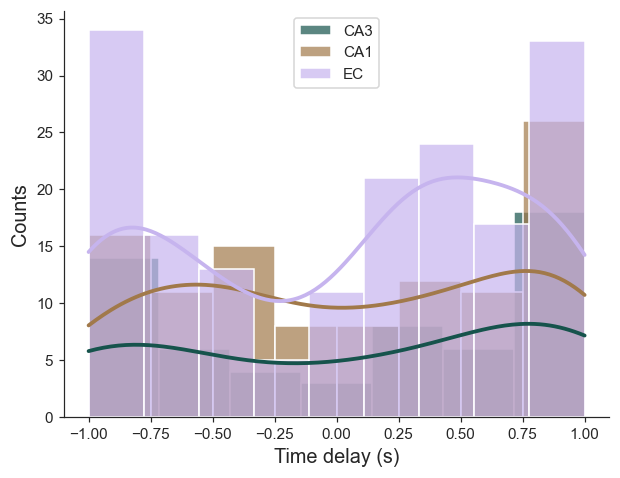

In [36]:
## plot the distributions on the same figure for all 3 regions
sns.set_style("ticks")
pal1 = sns.color_palette("cubehelix", 3)

fig, ax = plt.subplots(dpi=110)

sns.histplot(ca3_delays, alpha=0.7, label='CA3', kde=True, color = pal1[0], line_kws={'lw': 2.5})
sns.histplot(ca1_delays, alpha=0.7, label='CA1', kde=True, color = pal1[1], line_kws={'lw': 2.5})
sns.histplot(ec_delays, alpha=0.7, label='EC', kde=True, color = pal1[2], line_kws={'lw': 2.5})

ax.set_xlabel(f"Time delay (s)", fontsize = 13)
ax.set_ylabel(f"Counts", fontsize = 13)

ax.legend()
sns.despine()

# Plotting probability density for each time delay

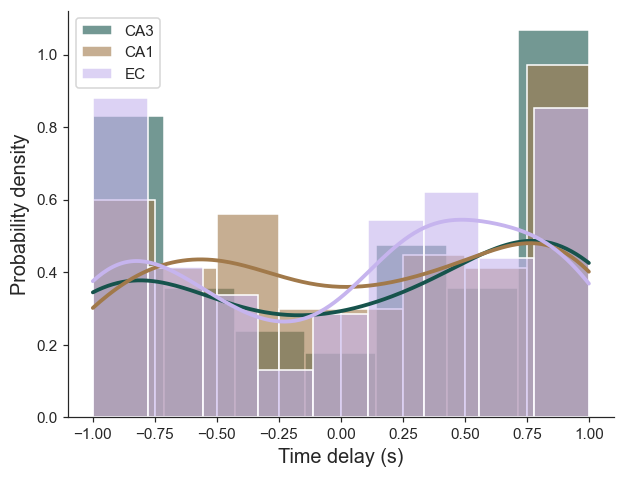

In [39]:
## plot the distributions on the same figure for all 3 regions: Considering probability density
sns.set_style("ticks")
pal1 = sns.color_palette("cubehelix", 3)

fig, ax = plt.subplots(dpi=110)

sns.histplot(ca3_delays, alpha=0.6, label='CA3', kde=True, color = pal1[0], line_kws={'lw': 2.5}, stat = 'density')
sns.histplot(ca1_delays, alpha=0.6, label='CA1', kde=True, color = pal1[1], line_kws={'lw': 2.5}, stat = 'density')
sns.histplot(ec_delays, alpha=0.6, label='EC', kde=True, color = pal1[2], line_kws={'lw': 2.5}, stat = 'density')

ax.set_xlabel(f"Time delay (s)", fontsize = 13)
ax.set_ylabel(f"Probability density", fontsize = 13)

ax.legend()
sns.despine()

# Plotting boxplot
- Takes away nuances but might make interpretation easier

<Axes: xlabel='region', ylabel='delay_time'>

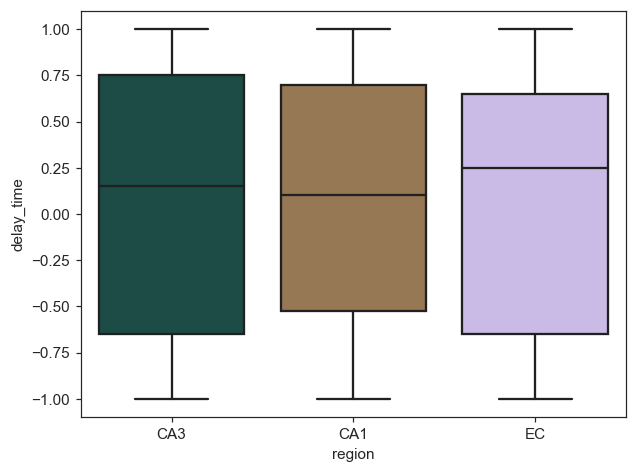

In [60]:
## box-whisker plots
sns.set_style("ticks")
pal1 = sns.color_palette("cubehelix", 3)


fig, ax = fig, ax = plt.subplots(dpi=110)

# sns.boxplot(ca3_delays.to_numpy())
# sns.boxplot(ca1_delays.to_numpy())

sns.boxplot(data = delay_data_df, x = 'region', y = 'delay_time', palette = pal1, order = ["CA3", "CA1", "EC"])

In [62]:
## print out the median delays
ca3_med_delay = np.median(ca3_delays.to_numpy())
ca1_med_delay = np.median(ca1_delays.to_numpy())
ec_med_delay = np.median(ec_delays.to_numpy())

print(f"Median delay in CA3: {ca3_med_delay} s")
print(f"Median delay in CA1: {ca1_med_delay} s")
print(f"Median delay in EC: {ec_med_delay} s")


Median delay in CA3: 0.15 s
Median delay in CA1: 0.1 s
Median delay in EC: 0.25 s
